# money problem
- you need to find the minium number of coins required for an amount
- eg: you need to give 40 rupees you have notes of [50, 20, 10, 5, 1] what is the minimum number of notes required?

In [10]:
def recursion_num_notes(amt, notes):

    if amt == 0:
        return 0
    
    min_notes = 9999
    for note in notes:
        if amt >= note:
            num_coins = recursion_num_notes(amt-note, notes)
            if num_coins+1 < min_notes:
                min_notes = num_coins+1
    return min_notes

amt = 100
notes = [50, 20, 10, 5, 1]
num_notes(amt, notes)

KeyboardInterrupt: 

In [20]:
def rec_num_notes(amt, notes):
    
    if amt == 0:
        return 0
    
    for note in notes:
        if amt >= note:
            
            return min(
                1 + rec_num_notes(amt-note, notes),
                rec_num_notes(amt, notes)
            )
        
amt = 100
notes = [50, 20, 10, 5, 1]
rec_num_notes(amt, notes)

RecursionError: maximum recursion depth exceeded in comparison

- need to reduce the recursive calls
    - may have to introduce a min_count
    - then check the min_count with count as in the case of 1st function

In [18]:
def rec_num_notes(amt, notes):
    
    if amt == 0:
        return 0
    
    min_count = 9999
    for note in notes:
        if amt >= note:
            count  = 1 + rec_num_notes(amt-note, notes)
            if count < min_count:
                min_count = count
    return min_count
        
amt = 40
notes = [50, 20, 10, 5, 1]

rec_num_notes(amt, notes)

2

- there code is inaccurate
- it will calculate many already computed methods again and again
    - like (recursion(70) in various recursions)

In [21]:
def rec_num_notes(amt, notes):
    
    if amt == 0:
        return 0
    
    # we can cash the values
    # amount is the variable
    cache = [0 for _ in range(amt+1)]
    
    for note in notes:
        if amt >= note:
            
            if cache[amt] == 0:
                cache[amt] =  rec_num_notes(amt, notes)
            if cache[amt-note] == 0:
                cache[amt-note] =  rec_num_notes(amt, notes)
                
            return min(
                1 + cache[amt-note],
                cache[amt]
            )
        
amt = 100
notes = [50, 20, 10, 5, 1]
rec_num_notes(amt, notes)

RecursionError: maximum recursion depth exceeded in comparison

- cahsing is also not working

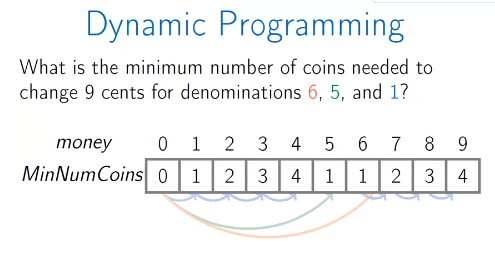

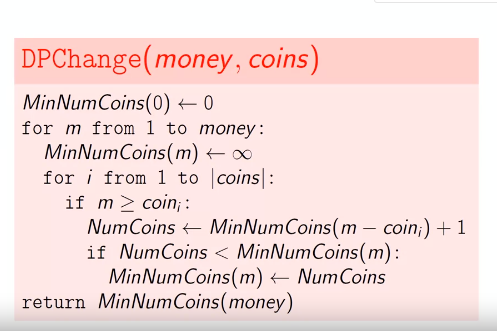

In [39]:
def dp_change(amt, notes):
    # define the metrix
    # initialize with max value since we are looking for a min value
    min_num_coins = [9999 for _ in range(amt+1)]
    
    # init the first row (& column)
    min_num_coins[0] = 0
    
    # for loop
    for m in range(1, amt+1):
        for note in notes:
            if m >= note: # check the amount can be given
                # we need to give one more note for the amount
                num_coins = min_num_coins[m-note]+1
                # some cases we have more than one combination
                # using 1 rupee, using 5 rupee or some combination
                # we need to take minimum
                if num_coins < min_num_coins[m]:
                    min_num_coins[m] = num_coins
    return min_num_coins[amt]

amt = 100
notes = [50, 20, 10, 5, 1]
dp_change(amt, notes)

2

In [43]:
def dp_min_coins(amt, notes):
    
    dp = [9999 for _ in range(amt+1)]
    
    dp[0] = 0
    
    for val in range(1, amt+1):
        for note in notes:
            if val >= note:
                min_count = dp[val-note]+1
                if min_count < dp[val]:
                    dp[val] = min_count
    return dp[amt]

amt = 1525
notes = [500, 100, 50, 20, 10, 5, 1]
dp_min_coins(amt, notes)

5

## 0-1 kanpsack

In [15]:
def dp_knapsack(weights, values, capacity):
    
    dp = [[0 for _ in range(capacity+1)] 
          for _ in range(len(weights)+1)]
    
    # initialize
    # capacity = 0: 0
    # weights = 0: 0
    for i in range(len(weights)+1):
        dp[i][0] = 0
    for i in range(capacity+1):
        dp[0][i] = 0
        
    for w in range(1, len(weights)+1):
        for c in range(1, capacity+1):
            if c >= weights[w-1]:
                dp[w][c] = max(
                    dp[w-1][c-weights[w-1]]+values[w-1],
                    dp[w-1][c]
                )
            else:
                dp[w][c] = dp[w-1][c]
    
    return dp

weights = [1, 3, 4, 5]
values = [1, 4, 5, 7]
capacity = 7

dp_knapsack(weights, values, capacity)

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 1, 1, 1, 1, 1],
 [0, 1, 1, 4, 5, 5, 5, 5],
 [0, 1, 1, 4, 5, 6, 6, 9],
 [0, 1, 1, 4, 5, 7, 8, 9]]

## find the given sum can be achived using the elements in an array

In [36]:
def dp_sum(sum, lst):
    
    dp = [[0 for _ in range(sum+1)]
          for _ in range(len(lst)+1)]
    
    # sum = 0, the column True
    for i in range(len(lst)+1):
        dp[i][0] = True
    for i in range(1, sum+1):
        dp[0][i] = False
    
    for i in range(1, len(lst)+1):
        for s in range(1, sum+1):
            
            if s >= i:
                dp[i][s] = (
                    dp[i-1][s-lst[i-1]] or
                    dp[i-1][s]
                )
            else:
                dp[i-1][s]
    
    return dp[-1][-1]

sum = 30
lst = [2, 3, 4, 5, 10]

dp_sum(sum, lst)

False

## Alignment Game
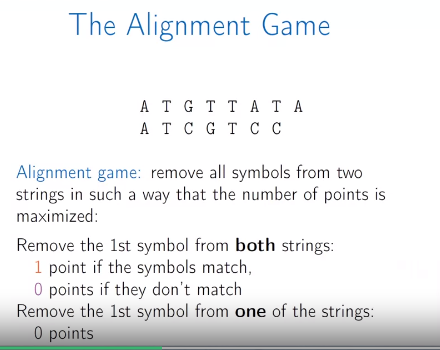

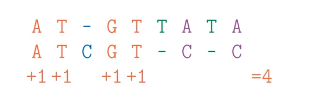

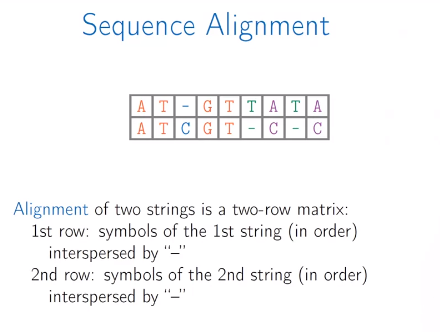

## alignment score
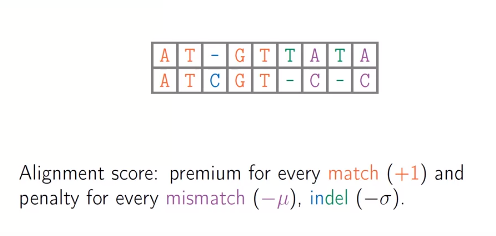

- optmial alignment
    - given mu, sigma and matches
    - an alignment of the string that maximize the score

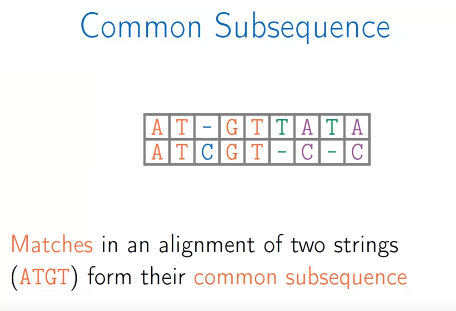

## longest common subsequence (another problem)
- input: two strings
- output: the longest common subsequence of these strings
- maximize the length of a common subsequence corresponds to maximizing the score of an alignment with 
- <b>mu = sigma = 0</b>

## Edit distance problem
- minimum number of operations
    - insertion, deletion, substitutions
- to transform one string into another

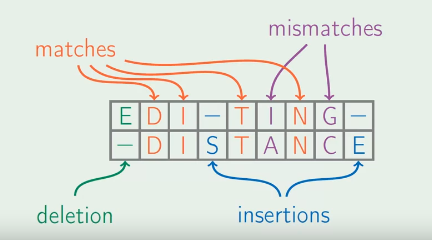

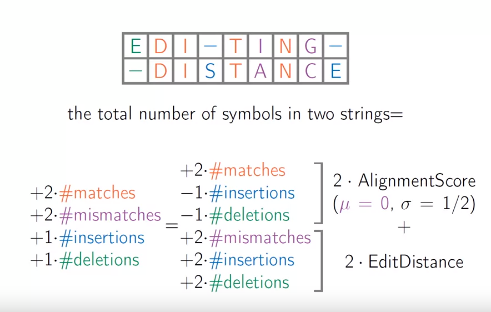

- minmizing edit distance = maximizing alignment score

## Edit distance problem
what is the number of changes (insertion, deletion, and mismatches) between 2 strings to make it same
- 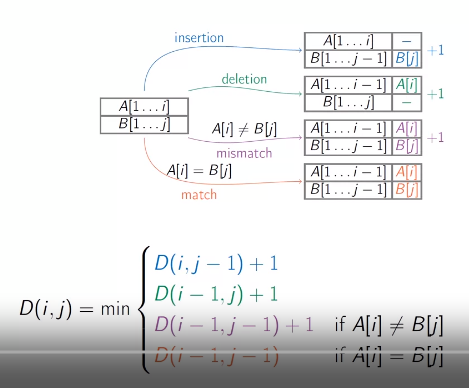

- 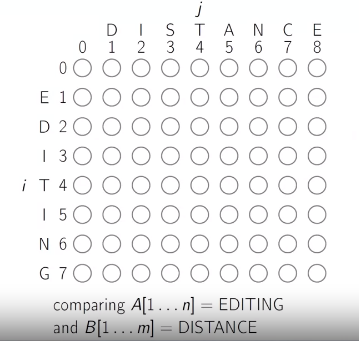

- initialization
- filling matrix
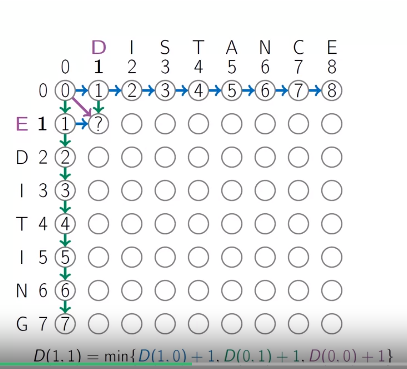

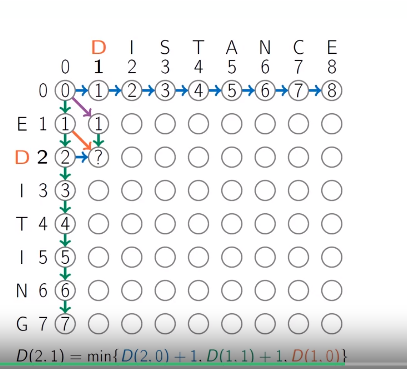

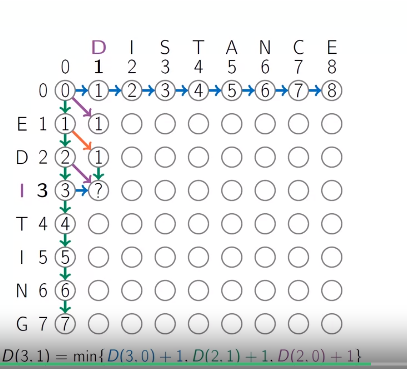

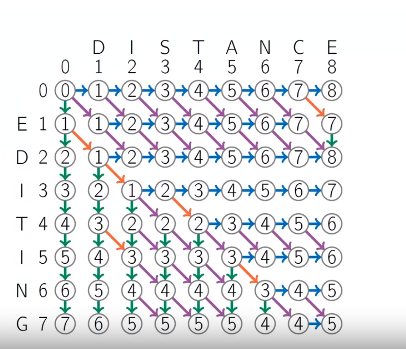

- psudo code
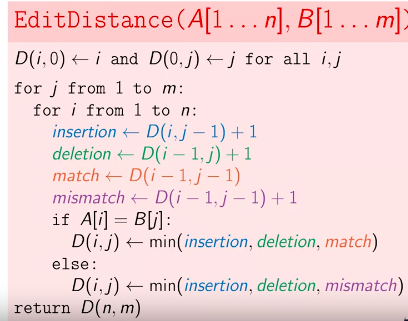

In [26]:
def dp_edit_distance(string1, string2):
    
    n = len(string1)
    m = len(string2)
    
    dp = [[0 for _ in range(m+1)]
     for _ in range(n+1)]
    
    # initialize (distance b/w the characters)
    for i in range(1, m+1):
        dp[0][i] = i
    for i in range(1, n+1):
        dp[i][0] = i
        
    for i in range(1, n+1):
        for j in range(1, m+1):
            if string1[i-1] == string2[j-1]:
                dp[i][j] = min(
                    dp[i-1][j]+1, # insertion
                    dp[i-1][j-1], # match
                    dp[i][j-1]+1 # deletion
                )
            else:
                dp[i][j] = min(
                    dp[i-1][j]+1, # insertion
                    dp[i-1][j-1]+1, # mismatch
                    dp[i][j-1]+1 # deletion
                )
                
    
    return dp

dp_edit_distance('distance', 'editing')
dp_edit_distance('bread', 'really')

[[0, 1, 2, 3, 4, 5, 6],
 [1, 1, 2, 3, 4, 5, 6],
 [2, 1, 2, 3, 4, 5, 6],
 [3, 2, 1, 2, 3, 4, 5],
 [4, 3, 2, 1, 2, 3, 4],
 [5, 4, 3, 2, 2, 3, 4]]

## Back tracking
- reconstructing the optimal alignment
    - if we move diagonal -> (match/ missmatch)
        - collect both characters
    - vertical or horizontal travel -> (insertion/ deletion)
        - insertion -> 1st string character
        - deletion -> 2nd string character
        
- optimal alignment
    - from the last point (m,n)
    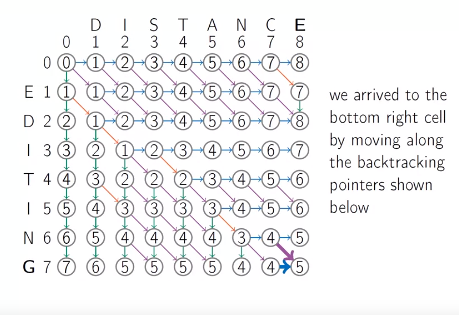
    



- reconstruction
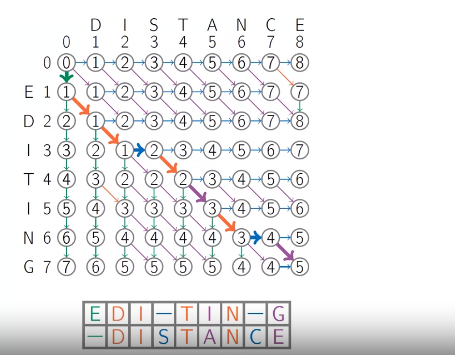

- output alignment code
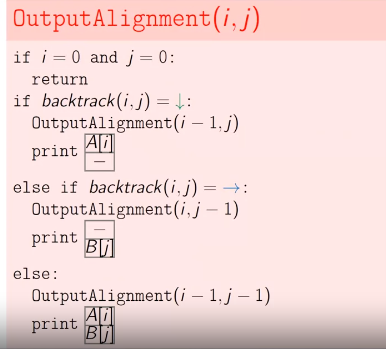
- how to find
    - vertical line
    - horzontal line
    - diagonal line
    
- code

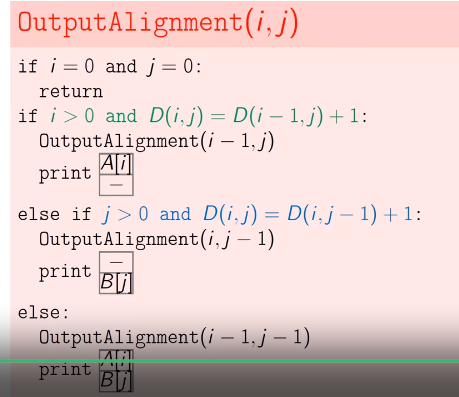

- edit distace
    - for string comparison
    - used for
        - search results
        - genome comparison etc

### need to implement back tracking